# CA03 – Decision Tree Algorithm

## 1. Data Source and Content

In [167]:
#Importing neccesary libraries

#General libraries:
import pandas as pd
import numpy as np

#Library for creating label encoding:
from sklearn.preprocessing import LabelEncoder

#Libraries for building Decision Tree:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

#Libraries for evaluating model performance:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve - issue explained below
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

#Libraries for creating visualizations:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Issue with plot_roc_curve library (from sklearn.metrics import plot_roc_curve) - this was the only library I couldn't import, I was getting an ImportError: "cannot import name 'plot_roc_curve' from 'sklearn.metrics'". I consluted it with Dr. Brahma and he said that fixing this error wouldn't be so easy and would take a lot of time so I was told not to worry about it and leave it (I commented out the code for roc curve so that it's there and if the library was imported, it would have worked)

In [273]:
#Reading the data
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

In [170]:
#Checking first few rows of data
df.head()

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0

Q1 - Why does it makes sense to discretize columns for this problem?

Discretization, also known as binning, is the process of converting continuous numerical values into categorical values by dividing them into a set of intervals or bins. It is frequently used in data preprocessing to simplify and reduce data complexity, making it easier to handle for machine learning algorithms. Discretization is particuarly beneficial for decision trees models because this machine learning algorithm is designed to work with categorical data. Additionally, discretization helps in handling outliers and highly skewed variables.

Q2 - What might be the issues (if any) if we DID NOT discretize the columns?

Overfitting: Continuous variables can have complex relationships with the target variable that decision trees may not capture

Increased computation time: Decision trees are designed to work with categorical data, and processing continuous variables can be computationally expensive, particularly with large datasets.

Difficulty reading and understanding results: Continuous variables can have complex relationships with the target variable that are difficult to interpret. Discretizing these variables can help to make the decision tree's results easier to interpret.

## 2. DataQualityAnalysis (DQA)

In [169]:
#Checking shape of the dataframe
df.shape

(48842, 11)

In [171]:
#Checking data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [8]:
#Checking for missing values - no missing values
print(df.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


In [9]:
#Summary statictics of numerical variables (only y - target variable)
df.describe()

y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [10]:
#Calculating cardinality of all variables using nunique function that displays number of unique values in a column
df.nunique()

hours_per_week_bin    5
occupation_bin        5
msr_bin               3
capital_gl_bin        3
race_sex_bin          3
education_num_bin     5
education_bin         5
workclass_bin         2
age_bin               5
flag                  2
y                     2
dtype: int64

In [11]:
#Calculating mode for each categorical variable
for column in df.columns:
    if df[column].dtype == 'object':
        mode = df[column].mode()[0]
        print(f"Mode of {column}: {mode}")

Mode of hours_per_week_bin: b. 31-40
Mode of occupation_bin: c. Mid - Mid
Mode of msr_bin: c. High
Mode of capital_gl_bin: a. = 0
Mode of race_sex_bin: c. High
Mode of education_num_bin: b. 9-12
Mode of education_bin: b. Mid
Mode of workclass_bin: b. income
Mode of age_bin: e. 40-55
Mode of flag: train


**Visualizations**

In [ ]:
#Creating stacked bars of categorical variables to show distribution of y values (target variable) for each category 

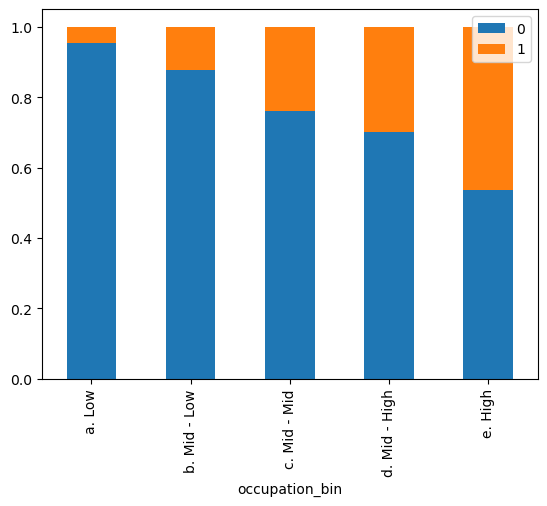

In [172]:
pd.crosstab(df['occupation_bin'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

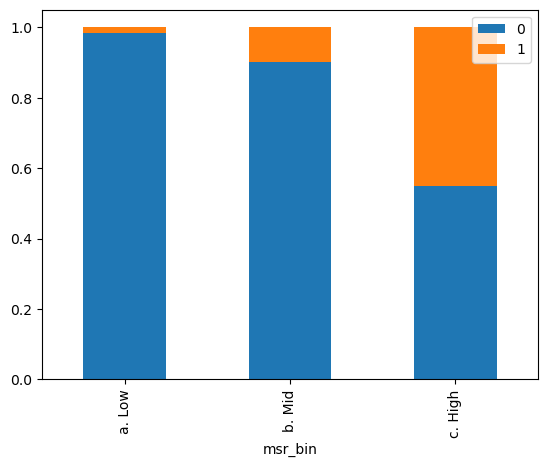

In [173]:
pd.crosstab(df['msr_bin'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

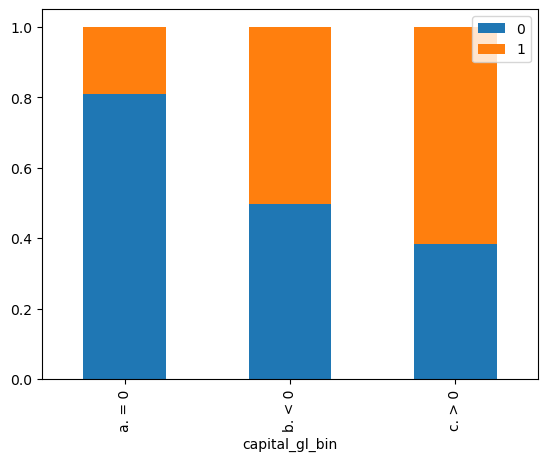

In [174]:
pd.crosstab(df['capital_gl_bin'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

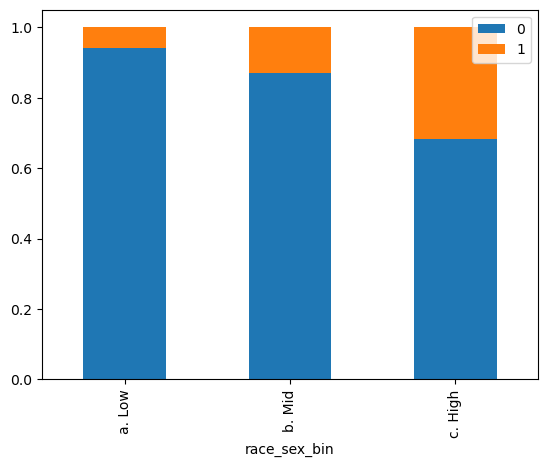

In [175]:
pd.crosstab(df['race_sex_bin'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

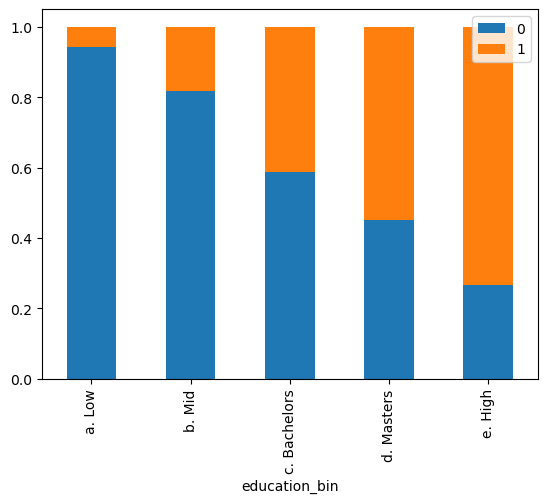

In [176]:
pd.crosstab(df['education_bin'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

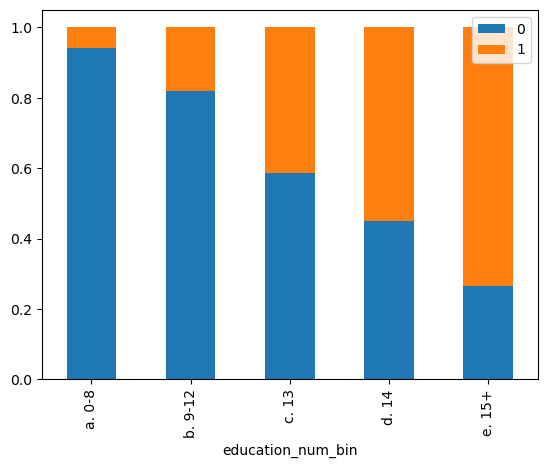

In [177]:
pd.crosstab(df['education_num_bin'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

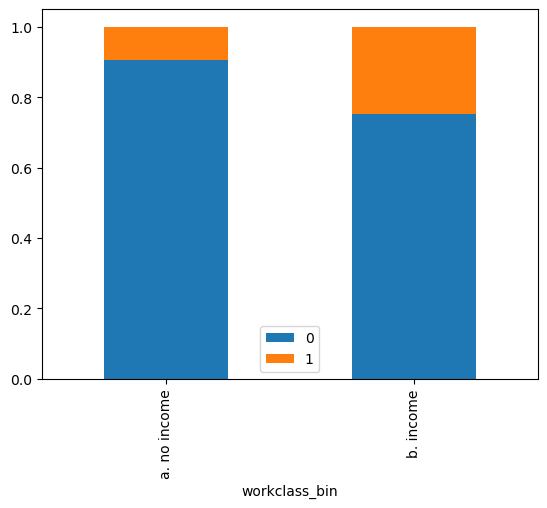

In [178]:
pd.crosstab(df['workclass_bin'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

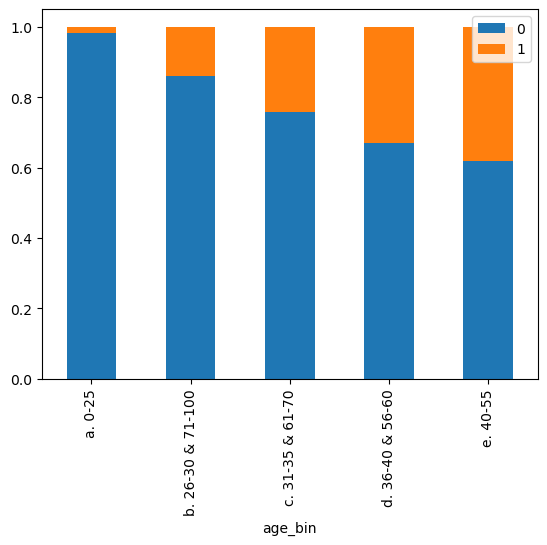

In [179]:
pd.crosstab(df['age_bin'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

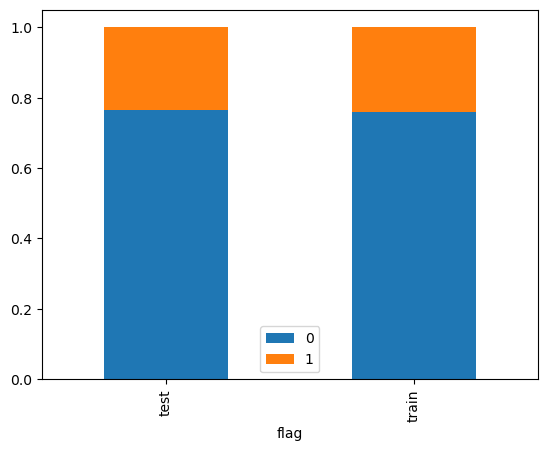

In [180]:
pd.crosstab(df['flag'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.legend()

**Encoding**

In [274]:
#Converting categorical variables to dummy variables through one-hot encoding
cols = ["workclass_bin", "education_num_bin", "education_bin", "msr_bin", "age_bin", "race_sex_bin",
                  "capital_gl_bin", "occupation_bin", "hours_per_week_bin"]
encoded_df = pd.get_dummies(df, columns=cols)

In [262]:
encoded_df.head()

flag  y  workclass_bin_a. no income  workclass_bin_b. income  \
0  train  0                           0                        1   
1  train  0                           0                        1   
2  train  0                           0                        1   
3  train  0                           0                        1   
4  train  0                           0                        1   

   education_num_bin_a. 0-8  education_num_bin_b. 9-12  \
0                         0                          0   
1                         0                          0   
2                         0                          1   
3                         1                          0   
4                         0                          0   

   education_num_bin_c. 13  education_num_bin_d. 14  education_num_bin_e. 15+  \
0                        1                        0                         0   
1                        1                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        1                        0                         0   

   education_bin_a. Low  ...  occupation_bin_a. Low  \
0                     0  ...                      0   
1                     0  ...                      0   
2                     0  ...                      1   
3                     1  ...                      1   
4                     0  ...                      0   

   occupation_bin_b. Mid - Low  occupation_bin_c. Mid - Mid  \
0                            1                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   occupation_bin_d. Mid - High  occupation_bin_e. High  \
0                             0                       0   
1                             0                       1   
2                             0                       0   
3                             0                       0   
4                             0                       1   

   hours_per_week_bin_a. 0-30  hours_per_week_bin_b. 31-40  \
0                           0                            1   
1                           1                            0   
2                           0                            1   
3                           0                            1   
4                           0                            1   

   hours_per_week_bin_c. 71-100  hours_per_week_bin_d. 41-50 & 61-70  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   hours_per_week_bin_e. 51-60  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 38 columns]

In [275]:
#Splitting the training data and checking the first few rows of train data
train = encoded_df.loc[encoded_df.flag == 'train']
train.head()

flag  y  workclass_bin_a. no income  workclass_bin_b. income  \
0  train  0                           0                        1   
1  train  0                           0                        1   
2  train  0                           0                        1   
3  train  0                           0                        1   
4  train  0                           0                        1   

   education_num_bin_a. 0-8  education_num_bin_b. 9-12  \
0                         0                          0   
1                         0                          0   
2                         0                          1   
3                         1                          0   
4                         0                          0   

   education_num_bin_c. 13  education_num_bin_d. 14  education_num_bin_e. 15+  \
0                        1                        0                         0   
1                        1                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        1                        0                         0   

   education_bin_a. Low  ...  occupation_bin_a. Low  \
0                     0  ...                      0   
1                     0  ...                      0   
2                     0  ...                      1   
3                     1  ...                      1   
4                     0  ...                      0   

   occupation_bin_b. Mid - Low  occupation_bin_c. Mid - Mid  \
0                            1                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   occupation_bin_d. Mid - High  occupation_bin_e. High  \
0                             0                       0   
1                             0                       1   
2                             0                       0   
3                             0                       0   
4                             0                       1   

   hours_per_week_bin_a. 0-30  hours_per_week_bin_b. 31-40  \
0                           0                            1   
1                           1                            0   
2                           0                            1   
3                           0                            1   
4                           0                            1   

   hours_per_week_bin_c. 71-100  hours_per_week_bin_d. 41-50 & 61-70  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   hours_per_week_bin_e. 51-60  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 38 columns]

In [276]:
#Splitting the tetsing data and checking the first few rows of test data
test = encoded_df.loc[encoded_df.flag == 'test']
test.head()

flag  y  workclass_bin_a. no income  workclass_bin_b. income  \
32561  test  0                           0                        1   
32562  test  0                           0                        1   
32563  test  1                           0                        1   
32564  test  1                           0                        1   
32565  test  0                           1                        0   

       education_num_bin_a. 0-8  education_num_bin_b. 9-12  \
32561                         1                          0   
32562                         0                          1   
32563                         0                          1   
32564                         0                          1   
32565                         0                          1   

       education_num_bin_c. 13  education_num_bin_d. 14  \
32561                        0                        0   
32562                        0                        0   
32563                        0                        0   
32564                        0                        0   
32565                        0                        0   

       education_num_bin_e. 15+  education_bin_a. Low  ...  \
32561                         0                     1  ...   
32562                         0                     0  ...   
32563                         0                     0  ...   
32564                         0                     0  ...   
32565                         0                     0  ...   

       occupation_bin_a. Low  occupation_bin_b. Mid - Low  \
32561                      0                            1   
32562                      0                            1   
32563                      0                            0   
32564                      0                            1   
32565                      0                            1   

       occupation_bin_c. Mid - Mid  occupation_bin_d. Mid - High  \
32561                            0                             0   
32562                            0                             0   
32563                            0                             1   
32564                            0                             0   
32565                            0                             0   

       occupation_bin_e. High  hours_per_week_bin_a. 0-30  \
32561                       0                           0   
32562                       0                           0   
32563                       0                           0   
32564                       0                           0   
32565                       0                           1   

       hours_per_week_bin_b. 31-40  hours_per_week_bin_c. 71-100  \
32561                            1                             0   
32562                            0                             0   
32563                            1                             0   
32564                            1                             0   
32565                            0                             0   

       hours_per_week_bin_d. 41-50 & 61-70  hours_per_week_bin_e. 51-60  
32561                                    0                            0  
32562                                    1                            0  
32563                                    0                            0  
32564                                    0                            0  
32565                                    0                            0  

[5 rows x 38 columns]

In [277]:
#Removing flag variable since it won't be needed anymore after the data is splitted
train.drop(columns='flag', inplace=True)
test.drop(columns='flag', inplace=True)

/var/folders/nj/ngzq6tfs32z2b7h6bhzhh7jm0000gr/T/ipykernel_38613/2306403107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns='flag', inplace=True)
/var/folders/nj/ngzq6tfs32z2b7h6bhzhh7jm0000gr/T/ipykernel_38613/2306403107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns='flag', inplace=True)


In [219]:
#Checking if flag column was removed from train data
train.head()

y  workclass_bin_a. no income  workclass_bin_b. income  \
0  0                           0                        1   
1  0                           0                        1   
2  0                           0                        1   
3  0                           0                        1   
4  0                           0                        1   

   education_num_bin_a. 0-8  education_num_bin_b. 9-12  \
0                         0                          0   
1                         0                          0   
2                         0                          1   
3                         1                          0   
4                         0                          0   

   education_num_bin_c. 13  education_num_bin_d. 14  education_num_bin_e. 15+  \
0                        1                        0                         0   
1                        1                        0                         0   
2                        0                        0                         0   
3                        0                        0                         0   
4                        1                        0                         0   

   education_bin_a. Low  education_bin_b. Mid  ...  occupation_bin_a. Low  \
0                     0                     0  ...                      0   
1                     0                     0  ...                      0   
2                     0                     1  ...                      1   
3                     1                     0  ...                      1   
4                     0                     0  ...                      0   

   occupation_bin_b. Mid - Low  occupation_bin_c. Mid - Mid  \
0                            1                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   occupation_bin_d. Mid - High  occupation_bin_e. High  \
0                             0                       0   
1                             0                       1   
2                             0                       0   
3                             0                       0   
4                             0                       1   

   hours_per_week_bin_a. 0-30  hours_per_week_bin_b. 31-40  \
0                           0                            1   
1                           1                            0   
2                           0                            1   
3                           0                            1   
4                           0                            1   

   hours_per_week_bin_c. 71-100  hours_per_week_bin_d. 41-50 & 61-70  \
0                             0                                    0   
1                             0                                    0   
2                             0                                    0   
3                             0                                    0   
4                             0                                    0   

   hours_per_week_bin_e. 51-60  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 37 columns]

In [220]:
#Checking if flag column was removed from test data
test.head()

y  workclass_bin_a. no income  workclass_bin_b. income  \
32561  0                           0                        1   
32562  0                           0                        1   
32563  1                           0                        1   
32564  1                           0                        1   
32565  0                           1                        0   

       education_num_bin_a. 0-8  education_num_bin_b. 9-12  \
32561                         1                          0   
32562                         0                          1   
32563                         0                          1   
32564                         0                          1   
32565                         0                          1   

       education_num_bin_c. 13  education_num_bin_d. 14  \
32561                        0                        0   
32562                        0                        0   
32563                        0                        0   
32564                        0                        0   
32565                        0                        0   

       education_num_bin_e. 15+  education_bin_a. Low  education_bin_b. Mid  \
32561                         0                     1                     0   
32562                         0                     0                     1   
32563                         0                     0                     1   
32564                         0                     0                     1   
32565                         0                     0                     1   

       ...  occupation_bin_a. Low  occupation_bin_b. Mid - Low  \
32561  ...                      0                            1   
32562  ...                      0                            1   
32563  ...                      0                            0   
32564  ...                      0                            1   
32565  ...                      0                            1   

       occupation_bin_c. Mid - Mid  occupation_bin_d. Mid - High  \
32561                            0                             0   
32562                            0                             0   
32563                            0                             1   
32564                            0                             0   
32565                            0                             0   

       occupation_bin_e. High  hours_per_week_bin_a. 0-30  \
32561                       0                           0   
32562                       0                           0   
32563                       0                           0   
32564                       0                           0   
32565                       0                           1   

       hours_per_week_bin_b. 31-40  hours_per_week_bin_c. 71-100  \
32561                            1                             0   
32562                            0                             0   
32563                            1                             0   
32564                            1                             0   
32565                            0                             0   

       hours_per_week_bin_d. 41-50 & 61-70  hours_per_week_bin_e. 51-60  
32561                                    0                            0  
32562                                    1                            0  
32563                                    0                            0  
32564                                    0                            0  
32565                                    0                            0  

[5 rows x 37 columns]

## 3. Build Decision Tree Classifier Models

In [278]:
#Extracting the target variable "y" from train data and assigning it to new variable "y_train"
y_train = train['y']
#Extracting all the other independent variables from train data and assigning them to a new variable "x_train"
x_train = train.drop('y', axis=1)

In [279]:
#Extracting the target variable "y" from test data and assigning it to new variable "y_test"
y_test = test['y']
#Extracting all the other independent variables from test data and assigning them to a new variable "x_train"
x_test = test.drop('y', axis=1)

In [223]:
#Building the decision tree model using DecisionTreeClassifier class from scikit-learn
dtree = DecisionTreeClassifier(max_depth=4, random_state=101,
                               max_features = None, min_samples_leaf=15)

dtree.fit(x_train, y_train)

#Storing the predicted values in "y_pred"
y_pred=dtree.predict(x_test)

## 4. Evaluate Decision Tree Performance

In [191]:
#Confusion Matrix
confusionmatrix=confusion_matrix(y_test, y_pred)
print(confusionmatrix)

[[11690   745]
 [ 2062  1784]]


In [192]:
#Calculating Accuracy, Recall, Precision, F1 Score

#Accuracy Score
accuracy= metrics.accuracy_score(y_test, y_pred)
print('Accuracy:',round(accuracy, 2))

#Recall
recall=recall_score(y_test, y_pred)
print('Recall:', round(recall, 2))

#Precision
precision= precision_score(y_test, y_pred)
print('Precision:', round(precision, 2))

#F1
f1=f1_score(y_test, y_pred)
print('F1 Score:', round(f1, 2))

Accuracy: 0.83
Recall: 0.46
Precision: 0.71
F1 Score: 0.56


In [193]:
#AUC Value
auc=roc_auc_score(y_test, y_pred)
print('AUC:', round(auc, 5))

AUC: 0.70197


In [195]:
#ROC Curve - the code doesn't work due to the issue with importing the plot_roc_curve library (issue explained at
#the top of the notebook below the section with importing libraries)
#plot_roc_curve(t, X_test, y_test)

## 5.Tune Decision Tree Performance (4 Hyperparameters)

**Run 1 - Split Criteria (Entropy or Gini Impurity)**

In [199]:
#Using a for loop to see the accuracy of criteria option model
results = []
criterion_options = ['entropy', 'gini']
for criterion in criterion_options:
    model = DecisionTreeClassifier(criterion=criterion,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(f"Accuracy {criterion}: {rounded_accuracy}")
print(results)

['Accuracy entropy: 0.835637', 'Accuracy gini: 0.836374']


**Maximum Features**

In [44]:
#Using a for loop to see the accuracy of each maximum feature option model (and criterion with the highest accuracy
#score developed above)
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.836005, 0.836312, 0.836435, 0.835637, 0.836497, 0.835637]


max_features: 0.3, accuracy: 0.836005
max_features: 0.4, accuracy: 0.836312
max_features: 0.5, accuracy: 0.836435
max_features: 0.6, accuracy: 0.835637
max_features: 0.7, accuracy: 0.836497
max_features: 0.8, accuracy: 0.835637


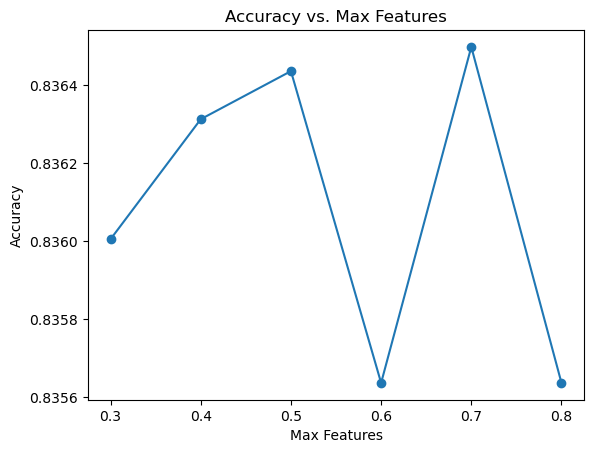

In [105]:
#Using a for loop to iterate through each hyperparameter value and see accuracy score for each model
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
    print("max_features: {}, accuracy: {}".format(max_features, rounded_accuracy))

#Creating a line graph to visualize the accuracy results
plt.plot(max_features_options, results, marker='o')
plt.title("Accuracy vs. Max Features")
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.show()

**Minimum Sample Leaf**

In [49]:
#Using a for loop to see the accuracy of each minimum sample leaf option model (and other hyperparameters with the
#highest accuracy score developed above)
results = []
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
for min_samples_leaf in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, max_features=0.7, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.8385, 0.8401, 0.8421, 0.8449, 0.8439, 0.8425, 0.8439, 0.8422]


min_samples_leaf: 5, accuracy: 0.8385
min_samples_leaf: 10, accuracy: 0.8401
min_samples_leaf: 15, accuracy: 0.8421
min_samples_leaf: 20, accuracy: 0.8449
min_samples_leaf: 25, accuracy: 0.8439
min_samples_leaf: 30, accuracy: 0.8425
min_samples_leaf: 35, accuracy: 0.8439
min_samples_leaf: 40, accuracy: 0.8422


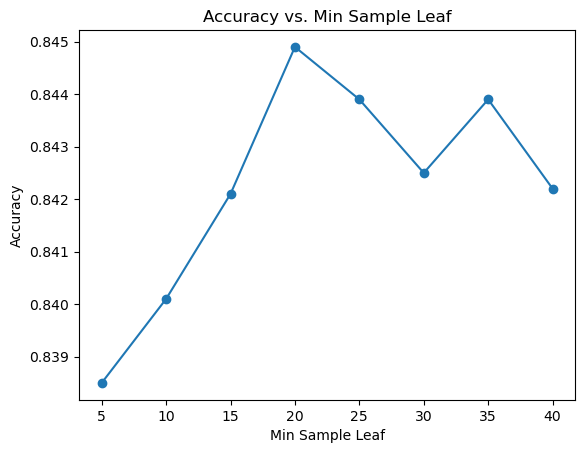

In [104]:
#Using a for loop to iterate through each hyperparameter value and see accuracy score for each model
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
results = []
for min_samples_leaf in min_samples_leaf_options:
    model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, max_features=0.7, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)
    print("min_samples_leaf: {}, accuracy: {}".format(min_samples_leaf, rounded_accuracy))

#Creating a line graph to visualize the accuracy results
plt.plot(min_samples_leaf_options, results, marker='o')
plt.title("Accuracy vs. Min Sample Leaf")
plt.xlabel("Min Sample Leaf")
plt.ylabel("Accuracy")
plt.show()

**Maximum Depth**

In [100]:
#Using a for loop to see the accuracy of each maximum depth option model (and other hyperparameters with the highest
#accuracy score developed above)
results = []
min_samples_leaf = 20
max_features = 0.7
criterion = 'gini'
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=0.7, min_samples_leaf=20, max_depth=max_depth, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 6)
    results.append(rounded_accuracy)
print("Accuracy:", results)

Accuracy: [0.842332, 0.842332, 0.842332, 0.842332, 0.842332, 0.842332, 0.842332, 0.842332, 0.842332, 0.842332]


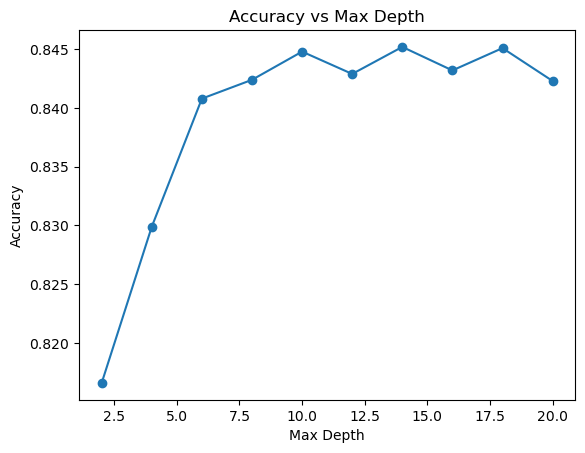

In [201]:
#Using a for loop to iterate through each hyperparameter value and see accuracy score for each model
results = []
min_samples_leaf = 20
max_features = 0.7
criterion = 'gini'
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for max_depth in max_depth_options:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, max_features=max_features, min_samples_leaf=min_samples_leaf, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    rounded_accuracy = round(accuracy, 4)
    results.append(rounded_accuracy)

#Creating a line graph to visualize the accuracy results
plt.plot(max_depth_options, results, marker='o')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

Q3 - Decision Tree Hyper-parameter variation vs. performance

In [32]:
#Using a for loop to evaluate the performance of the 1st decision tree using two different criteria "entropy" and
#"gini" and creating a table with the results
criterion_options = ['entropy', 'gini']
results = []
for criterion in criterion_options:
    dtree = DecisionTreeClassifier(criterion=criterion, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Criteria": criterion, "Accuracy": report["accuracy"], "Precision": report["macro avg"]["precision"],
           "Recall": report["macro avg"]["recall"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results)
results_df.set_index("Criteria", inplace=True)
print(results_df)

          Accuracy  Precision    Recall  F1-Score
Criteria                                         
entropy   0.835637   0.779353  0.739029  0.755292
gini      0.836374   0.780950  0.738972  0.755774


In [43]:
#Using a for loop to evaluate the performance of the 2nd decision tree using gini as the criterion (it had higher
#accuracy score than entropy) and different max features hyperparameter options: 0.3, 0.4, 0.5, 0.6, 0.7, 0.8
#and creating a table with the results at the end
results = []
max_features_options = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for max_features in max_features_options:
    model = DecisionTreeClassifier(criterion='gini', max_features=max_features, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Accuracy": report["accuracy"], "Recall": report["macro avg"]["recall"], "Precision": report["macro avg"]["precision"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results, index=max_features_options)
print(results_df)

     Accuracy    Recall  Precision  F1-Score
0.3  0.836005  0.739180   0.780082  0.755636
0.4  0.836312  0.739202   0.780731  0.755863
0.5  0.836435  0.739013   0.781067  0.755840
0.6  0.835637  0.738400   0.779583  0.754932
0.7  0.836497  0.739232   0.781116  0.756009
0.8  0.835637  0.738400   0.779583  0.754932


In [51]:
#Using a for loop to evaluate the performance of the 3rd decision tree using gini as the criterion,
#max feature option with the highest accuracy score (max feature of 0.7) and different min sample leaf hyperparameter
#options: 5, 10, 15, 20, 25, 30, 35, 40 and creating a table with the results at the end
min_samples_leaf_options = [5, 10, 15, 20, 25, 30, 35, 40]
results = []
max_features = 0.7
for min_samples_leaf in min_samples_leaf_options:
    dtree = DecisionTreeClassifier(criterion='gini', max_features=max_features, min_samples_leaf=min_samples_leaf, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    row = {"Min Sample Leaf": min_samples_leaf, "Accuracy": report["accuracy"], "Precision": report["macro avg"]["precision"],
           "Recall": report["macro avg"]["recall"], "F1-Score": report["macro avg"]["f1-score"]}
    results.append(row)
results_df = pd.DataFrame(results)
results_df.set_index("Min Sample Leaf", inplace=True)
print(results_df)

                 Accuracy  Precision    Recall  F1-Score
Min Sample Leaf                                         
5                0.838523   0.785246  0.740021  0.757884
10               0.840059   0.788071  0.741475  0.759803
15               0.842147   0.791523  0.744368  0.762939
20               0.844911   0.797437  0.745549  0.765611
25               0.843867   0.793117  0.749445  0.767008
30               0.842516   0.795086  0.739042  0.760145
35               0.843867   0.794936  0.745584  0.764869
40               0.842209   0.792502  0.742613  0.761989


In [53]:
#Using a for loop to evaluate the performance of the 4th decision tree using gini as the criteria,
#max feature option with the highest accuracy score (max feature of 0.7), min sample leaf with the highest accuracy
#score (min sample leaf of 20) and different max depth hyperparameter options: 2, 4, 6, 8, 10, 12, 14, 16, 18, 20
#and creating a table with the results at the end
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
results = []
for max_depth in max_depth_options:
    dtree = DecisionTreeClassifier(criterion='gini', max_features=0.7, min_samples_leaf=20, max_depth=max_depth, random_state=101)
    dtree.fit(x_train, y_train)
    y_pred = dtree.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({'Accuracy': report['accuracy'], 
                    'Recall': report['1']['recall'], 
                    'Precision': report['1']['precision'], 
                    'F1 Score': report['1']['f1-score']})
results_df = pd.DataFrame(results, index=max_depth_options)
results_df.index.name = 'Max Depth'
print(results_df)

           Accuracy    Recall  Precision  F1 Score
Max Depth                                         
2          0.816596  0.397816   0.695455  0.506120
4          0.829924  0.457878   0.720245  0.559847
6          0.840796  0.595944   0.688288  0.638796
8          0.842393  0.543162   0.720842  0.619514
10         0.844788  0.571763   0.714193  0.635090
12         0.842884  0.567603   0.709227  0.630560
14         0.845157  0.556162   0.724348  0.629210
16         0.843191  0.562923   0.712875  0.629086
18         0.845096  0.569683   0.716481  0.634705
20         0.842332  0.564483   0.708782  0.628456


## 6. Visualize Your Best Decision Tree

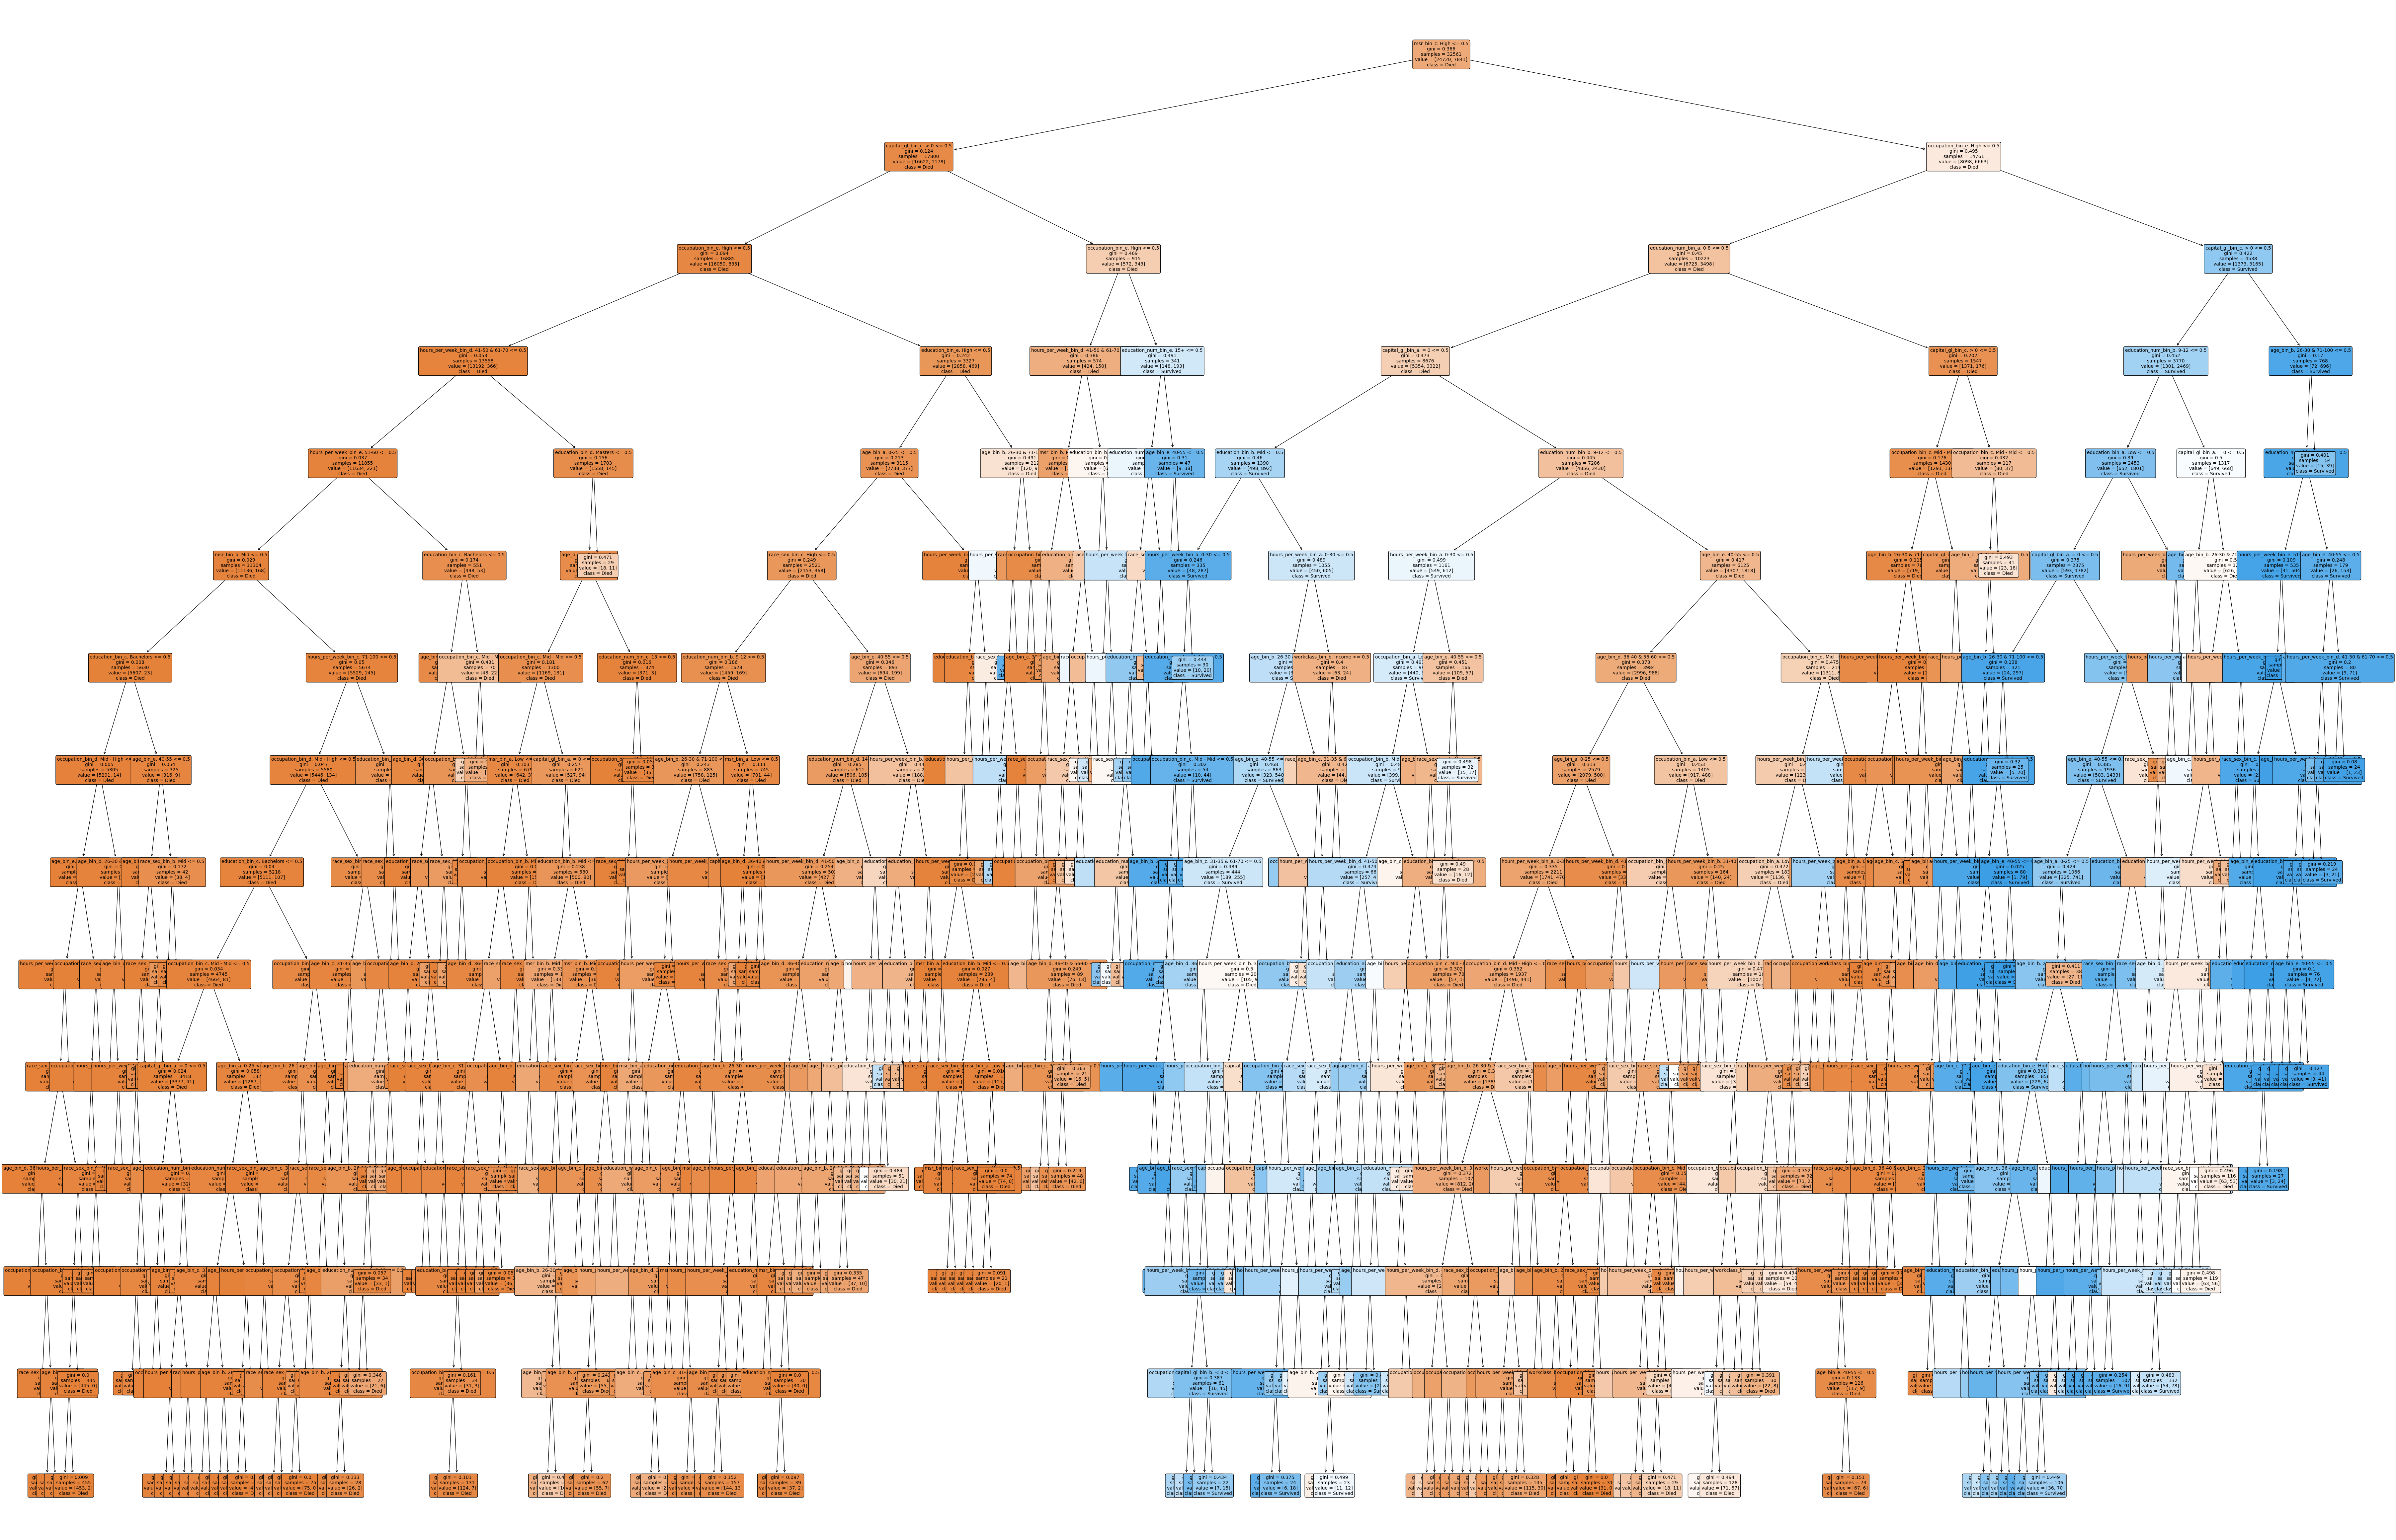

In [289]:
#visualizing the "best" decision tree developed in the previous part
best_dtree = DecisionTreeClassifier(criterion='gini', max_features=0.7, min_samples_leaf=20, max_depth=14, random_state=101)
best_dtree.fit(x_train, y_train)
plt.figure(figsize=(90, 60))
a = plot_tree(best_dtree, feature_names=list(x_train), class_names=['Died', 'Survived'],
              filled=True, rounded=True, fontsize=10)
plt.show()

## 7. Conclusion

Q4 - How long was your total run time to train the best model?

The total runtime to trai the best model was 42.5 miliseconds.

In [ ]:
#runtime of best tree - cell below

In [68]:
%%time

best_dtree = DecisionTreeClassifier(criterion='gini', max_features=0.7, min_samples_leaf=20,max_depth=14, random_state=101)
best_dtree.fit(x_train, y_train)
y_pred=best_dtree.predict(x_test)

CPU times: user 39.2 ms, sys: 4.25 ms, total: 43.4 ms
Wall time: 42.5 ms


Q5 - Did you find the BEST TREE? 

Even though I found a good decision tree model that performs well on a given dataset and I was tuning the performance of the originally developed tree eventually getting a slightly higher accuracy score than the first tree, the model I developed is not the best possible tree. It would require a lot of additional time and work on 
experimenting with hyperparameters to find the "best" tree, however, the word "best" is only relative because I don't think that the perfect and the best tree exists at all. Even if I thought I developed a really good tree and in my opinion, it would be the best, there are probably many other ones developed by other people that perform better than mine.

Q6 - Write your observations from the visualization of the best tree.

The tree seems to be very complex with too many features and interactions and it looks a little bit confusing - it makes it difficult to interpret and extract meaningful insights. Even though the figure size is big and the leaves are small, a lot of them overlap and it is hard to read the information from them. It is possible that the tree might have a lot of redundancy - it can contain many similar or identical branches but it's hard for me to say since I can't really see all of them. I think that the minimum sample leaf of 20 (20 means that each leaf node must have at least 20 samples) and the maximum depth of 14 are the main reasons why the tree looks pretty complex.

Q7 - Will this Tree “overfit”?

This tree will probably overfit since first of all the max_depth hyperparameter is set to 14 (it gave the highest accuracy, however, it might cause overfitting) and second of all a lot of leaves at the bottom of the tree have a gini score around 0.5 and the closer to 1 the higher the chances of impurity potentially causing overfitting and suggesting that the model is not yet optimal.

## 8. Prediction using your “trained” Decision Tree Model

In [280]:
#Creating a "person_data"dictionary with information about a new individual in a form of dummy variables that will
#match the x_test df
person_data = {'workclass_bin_a. no income': 0, 'workclass_bin_b. income': 1,
       'education_num_bin_a. 0-8': 0, 'education_num_bin_b. 9-12': 1,
       'education_num_bin_c. 13': 0, 'education_num_bin_d. 14': 0,
       'education_num_bin_e. 15+': 0, 'education_bin_a. Low': 0,
       'education_bin_b. Mid': 0, 'education_bin_c. Bachelors': 0,
       'education_bin_d. Masters': 0, 'education_bin_e. High': 1, 'msr_bin_a. Low': 0,
       'msr_bin_b. Mid': 0, 'msr_bin_c. High': 1, 'age_bin_a. 0-25': 0,
       'age_bin_b. 26-30 & 71-100': 0, 'age_bin_c. 31-35 & 61-70': 0,
       'age_bin_d. 36-40 & 56-60': 1, 'age_bin_e. 40-55': 0, 'race_sex_bin_a. Low': 0,
       'race_sex_bin_b. Mid': 1, 'race_sex_bin_c. High': 0, 'capital_gl_bin_a. = 0': 0,
       'capital_gl_bin_b. < 0': 0, 'capital_gl_bin_c. > 0': 1,
       'occupation_bin_a. Low': 0, 'occupation_bin_b. Mid - Low': 1,
       'occupation_bin_c. Mid - Mid': 0, 'occupation_bin_d. Mid - High': 0,
       'occupation_bin_e. High': 0, 'hours_per_week_bin_a. 0-30': 0,
       'hours_per_week_bin_b. 31-40': 0, 'hours_per_week_bin_c. 71-100': 0,
       'hours_per_week_bin_d. 41-50 & 61-70': 1, 'hours_per_week_bin_e. 51-60': 0}

In [281]:
#Creating a new df called "new_row" with the data from "person_data" and assigning it an index of 16281 - 
#there are 16281 rows in x_test df so assigning it to an index of 16281 would place it at the end of x_test (index
#starts at 0)
new_row = pd.DataFrame(person_data, index=[16281])

In [282]:
#Checking single row df called "new_row"
new_row

workclass_bin_a. no income  workclass_bin_b. income  \
16281                           0                        1   

       education_num_bin_a. 0-8  education_num_bin_b. 9-12  \
16281                         0                          1   

       education_num_bin_c. 13  education_num_bin_d. 14  \
16281                        0                        0   

       education_num_bin_e. 15+  education_bin_a. Low  education_bin_b. Mid  \
16281                         0                     0                     0   

       education_bin_c. Bachelors  ...  occupation_bin_a. Low  \
16281                           0  ...                      0   

       occupation_bin_b. Mid - Low  occupation_bin_c. Mid - Mid  \
16281                            1                            0   

       occupation_bin_d. Mid - High  occupation_bin_e. High  \
16281                             0                       0   

       hours_per_week_bin_a. 0-30  hours_per_week_bin_b. 31-40  \
16281                           0                            0   

       hours_per_week_bin_c. 71-100  hours_per_week_bin_d. 41-50 & 61-70  \
16281                             0                                    1   

       hours_per_week_bin_e. 51-60  
16281                            0  

[1 rows x 36 columns]

In [283]:
#Appending a single row df called "new_row" with the new individual data to the x_test df
x_test = x_test.append(new_row, ignore_index=True)

/var/folders/nj/ngzq6tfs32z2b7h6bhzhh7jm0000gr/T/ipykernel_38613/922551317.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_test = x_test.append(new_row, ignore_index=True)


In [284]:
#Checkig if "new_row" with "person_data" was appended at the end of x_test df
x_test

workclass_bin_a. no income  workclass_bin_b. income  \
0                               0                        1   
1                               0                        1   
2                               0                        1   
3                               0                        1   
4                               1                        0   
...                           ...                      ...   
16277                           1                        0   
16278                           0                        1   
16279                           0                        1   
16280                           0                        1   
16281                           0                        1   

       education_num_bin_a. 0-8  education_num_bin_b. 9-12  \
0                             1                          0   
1                             0                          1   
2                             0                          1   
3                             0                          1   
4                             0                          1   
...                         ...                        ...   
16277                         0                          1   
16278                         0                          0   
16279                         0                          0   
16280                         0                          0   
16281                         0                          1   

       education_num_bin_c. 13  education_num_bin_d. 14  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
16277                        0                        0   
16278                        1                        0   
16279                        1                        0   
16280                        1                        0   
16281                        0                        0   

       education_num_bin_e. 15+  education_bin_a. Low  education_bin_b. Mid  \
0                             0                     1                     0   
1                             0                     0                     1   
2                             0                     0                     1   
3                             0                     0                     1   
4                             0                     0                     1   
...                         ...                   ...                   ...   
16277                         0                     0                     1   
16278                         0                     0                     0   
16279                         0                     0                     0   
16280                         0                     0                     0   
16281                         0                     0                     0   

       education_bin_c. Bachelors  ...  occupation_bin_a. Low  \
0                               0  ...                      0   
1                               0  ...                      0   
2                               0  ...                      0   
3                               0  ...                      0   
4                               0  ...                      0   
...                           ...  ...                    ...   
16277                           0  ...                      0   
16278                           1  ...                      0   
16279                           1  ...                      0   
16280                           1  ...                      0   
16281                           0  ...                      0   

       occupation_bin_b. Mid - Low  occupation_bin_c. Mid - Mid  \
0          

In [285]:
#Predicting the class label for a single instance (new individual data with an index of 16281 in x_test df) 
#using the trained decision tree classifier called "best_dtree" developed in the previous parts 
#and the "predict" method
best_dtree = DecisionTreeClassifier(criterion='gini', max_features=0.7, min_samples_leaf=20,max_depth=14, random_state=101)
best_dtree.fit(x_train, y_train)
y_pred = best_dtree.predict(x_test.iloc[[16281]])
print(y_pred)

[1]


Q8 - What is the probability that your prediction for this person is correct?

In [288]:
#A predicted class label of 1 (y_pred=1) corresponds to an income category of >50K, while a predicted class label
#of 0 (y_pred=0) corresponds to an income category of <=50K
if y_pred == 0:
  print('Class label 0 - The predicted annual income category is < $50,000')
if y_pred == 1:
  print('Class label 1 - The predicted annual income category is > $50,000')
else: print('not applicable')

Class label 1 - The predicted annual income category is > $50,000


In [165]:
#Calculating the probability - the output gived a 2D arrray where the first value is probability of y_pred=0 and
#second value is y_pred=1(['<=50K', '>50K']). Since y_pred in this case was 1, we look at the second value.
#The probability that my prediction for the new individual is correct is 87.5%
prob=best_dtree.predict_proba(x_test.iloc[[16281]])
print('Probability: ', prob)

Probability:  [[0.12459016 0.87540984]]
